In [1]:
# IMPORTING LIBRARIES
import numpy as np # Used for linear algebra
import pandas as pd # Used for data processing
import seaborn as sns # visualization tool
import matplotlib.pyplot as plt # Visualization tool

In [2]:
# Reading csv file
df = pd.read_csv('googleplaystore.csv', parse_dates= True)
print(type(df)) #Print data type of dataframe
df.head()  # Print first five rows of dataframe

<class 'pandas.core.frame.DataFrame'>


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.columns # columns attribute returns name of columns in the dataframe

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [4]:
df.shape  # shape attribute returns the rows and columns in the tuple form

(10841, 13)

In [5]:
df.info()  # info method returns the non-null count and dtype of each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.describe()  # describe method returns the statistics summary of data

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


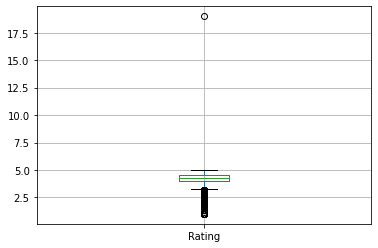

In [7]:
_ = df.boxplot()

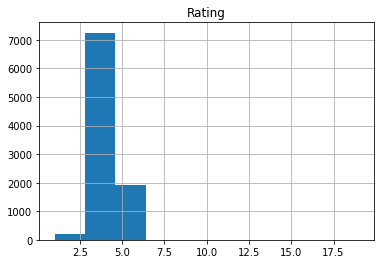

In [8]:
_ = df.hist()

## DATA CLEANING

### Checking Outliers

In [9]:
df.Category.unique()  #Returns the unique Category names

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [10]:
df[df.Category == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
df.drop([10472], inplace = True)

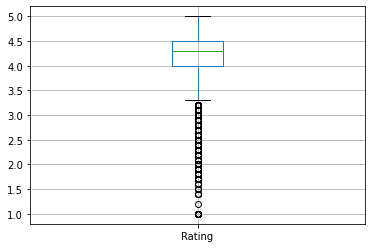

In [12]:
_ = df.boxplot()

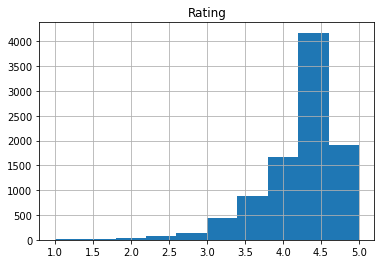

In [13]:
_ = df.hist()

### Changing all data of Rating to float data type

In [42]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
print(df['Rating'].dtype)

float64


### Changing Reviews column data type

In [15]:
print(df.Reviews.unique())
print(df.Reviews.dtype)

['159' '967' '87510' ... '603' '1195' '398307']
object


In [16]:
df.Reviews = df.Reviews.astype(float)
print(df.Reviews.dtype)

float64


### Changing Size column data type

In [17]:
print(df.Size.unique())
print(df.Size.dtype)

['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M'
 '6.0M' '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device'
 '9.4M' '15M' '10M' '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M'
 '201k' '3.6M' '5.7M' '8.6M' '2.4M' '27M' '2.5M' '16M' '3.4M' '8.9M'
 '3.9M' '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M'
 '9.0M' '6.7M' '30M' '2.6M' '7.1M' '3.7M' '22M' '7.4M' '6.4M' '3.2M'
 '8.2M' '9.9M' '4.9M' '9.5M' '5.0M' '5.9M' '13M' '73M' '6.8M' '3.5M'
 '4.0M' '2.3M' '7.2M' '2.1M' '42M' '7.3M' '9.1M' '55M' '23k' '6.5M' '1.5M'
 '7.5M' '51M' '41M' '48M' '8.5M' '46M' '8.3M' '4.3M' '4.7M' '3.3M' '40M'
 '7.8M' '8.8M' '6.6M' '5.1M' '61M' '66M' '79k' '8.4M' '118k' '44M' '695k'
 '1.6M' '6.2M' '18k' '53M' '1.4M' '3.0M' '5.8M' '3.8M' '9.6M' '45M' '63M'
 '49M' '77M' '4.4M' '4.8M' '70M' '6.9M' '9.3M' '10.0M' '8.1M' '36M' '84M'
 '97M' '2.0M' '1.9M' '1.8M' '5.3M' '47M' '556k' '526k' '76M' '7.6M'

In [18]:
df.Size = df.Size.apply(lambda x: str(x).replace("Varies with device",str(np.nan)) if "Varies with device" in str(x) else str(x))
df.Size = df.Size.apply(lambda x: str(x).replace("M","000") if "M" in str(x) else str(x)) # All size values became the kilobyte.
df.Size = df.Size.apply(lambda x: str(x).replace("k","") if "k" in str(x) else str(x))
df.Size = df.Size.astype(float)
print(df.Size.dtype)

float64


### Changing Installs column data type

In [19]:
print(df.Installs.unique())
print(df.Installs.dtype)

['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0']
object


In [20]:
df.Installs = df.Installs.apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
df.Installs = df.Installs.apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
df.Installs = df.Installs.apply(lambda x: float(x))
print(df.Installs.dtype)

float64


### Changing Price Column data type

In [21]:
print(df.Price.unique())
print(df.Price.dtype)

['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' '$1.20'
 '$1.04']
object


In [22]:
df.Price = df.Price.apply((lambda x: str(x).replace('$','') if '$' in str(x) else str(x)))
df.Price = df.Price.apply(lambda x: float(x))
print(df.Price.dtype)

float64


### Changing Last Updated Column data type

In [23]:
print(df['Last Updated'].unique())
print(df['Last Updated'].dtype)

['January 7, 2018' 'January 15, 2018' 'August 1, 2018' ...
 'January 20, 2014' 'February 16, 2014' 'March 23, 2014']
object


In [24]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])  # Convert string to datetime datatype
print(df['Last Updated'].dtype)
print(df['Last Updated'])

datetime64[ns]
0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]


## Data Manipulation

In [25]:
print(df.isnull().sum())  # isnull method replace all the data with boolean values. If the data is null then it changes to True.

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [26]:
def impute_median(series):
    return series.fillna(series.median)

In [27]:
df.Rating = df.Rating.transform(impute_median)

In [28]:
print(df.isnull().sum())

App                  0
Category             0
Rating               0
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [29]:
print(df.Type.mode())
print(df['Current Ver'].mode())
print(df['Android Ver'].mode())

0    Free
Name: Type, dtype: object
0    Varies with device
Name: Current Ver, dtype: object
0    4.1 and up
Name: Android Ver, dtype: object


In [30]:
df['Type'].fillna(str(df['Type'].mode().values),inplace = True)
df['Current Ver'].fillna(str(df['Current Ver'].mode().values),inplace = True)
df['Android Ver'].fillna(str(df['Android Ver'].mode().values),inplace = True)

In [31]:
print(df.isnull().sum())

App                  0
Category             0
Rating               0
Reviews              0
Size              1695
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64


In [32]:
df.dropna(inplace = True)

In [33]:
df.describe()

,Reviews,Size,Installs,Price
count,9.145000e+03,9145.000000,9.145000e+03,9145.000000
mean,2.490487e+05,19579.419913,7.114842e+06,1.184366
std,1.716211e+06,24042.062020,4.619357e+07,17.355754
min,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,2.200000e+01,5.600000,1.000000e+03,0.000000
50%,7.420000e+02,13000.000000,1.000000e+05,0.000000
75%,2.503700e+04,30000.000000,1.000000e+06,0.000000
max,4.489389e+07,100000.000000,1.000000e+09,400.000000


## Data Visualization

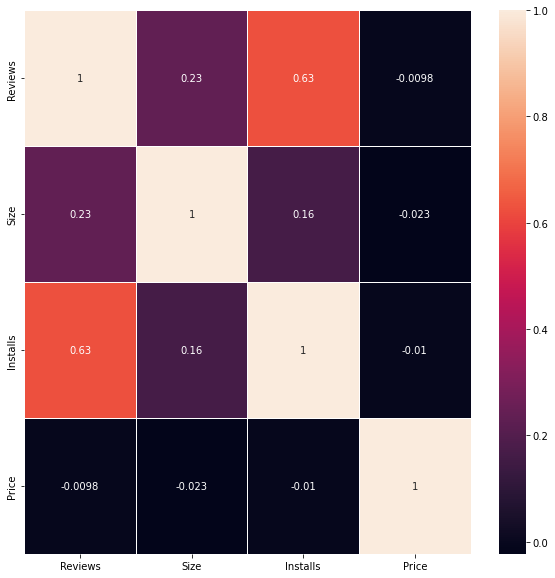

In [34]:
# Plotting correlation map between numerical values
fig, ax =plt.subplots(figsize=(10,10))
_ = sns.heatmap(df.corr(), annot =True, linewidths= 1)
plt.show()

### Category vs Installs

In [35]:
x = df.groupby('Category')['Installs'].agg(np.mean)

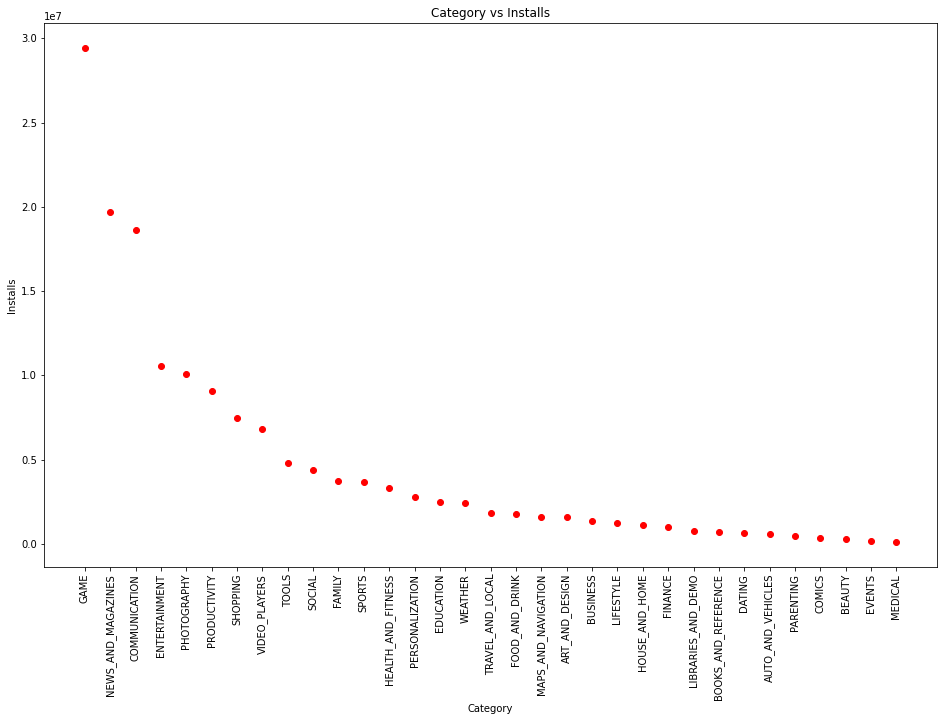

In [36]:
_ = plt.figure(figsize=(16,10))
_ = plt.plot(x.sort_values(ascending = False), 'o', color = 'r')
_ = plt.xticks(rotation = 90)
_ = plt.title('Category vs Installs')
_ = plt.xlabel('Category')
_ = plt.ylabel('Installs')
plt.show()

### Category vs Price

In [37]:
y = df.groupby('Category')['Price'].agg(np.mean)

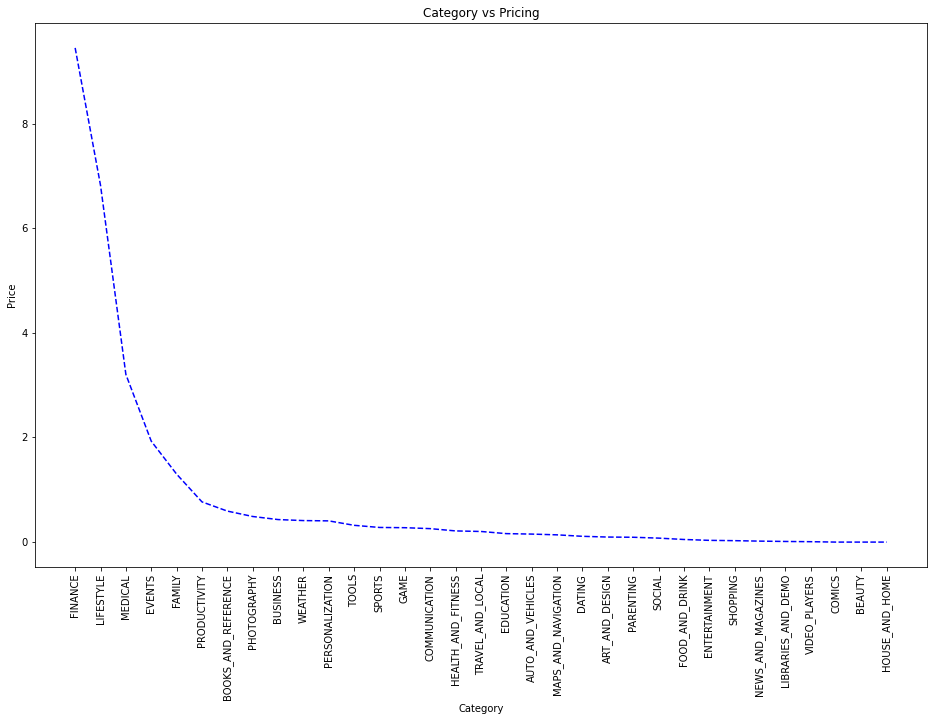

In [38]:
_ = plt.figure(figsize=(16,10))
_ = plt.plot(y.sort_values(ascending= False), '--', color = 'b')
_ = plt.xticks(rotation = 90)
_ = plt.title('Category vs Pricing')
_ = plt.xlabel('Category')
_ = plt.ylabel('Price')
plt.show()

### Category vs Reviews

In [39]:
z = df.groupby('Category')['Reviews'].agg(np.mean)

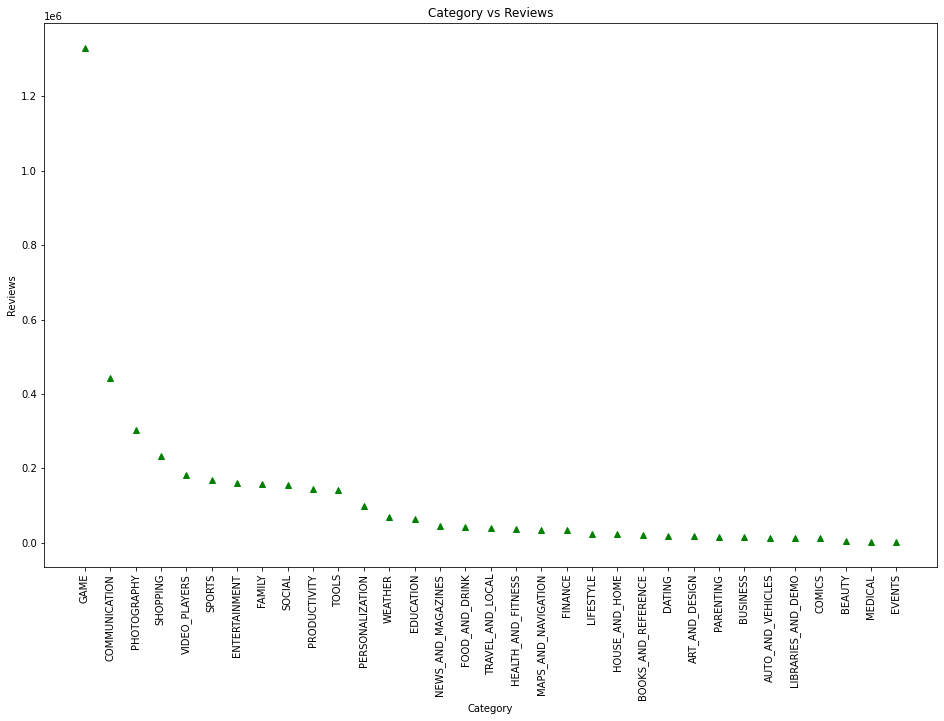

In [40]:
_ = plt.figure(figsize=(16,10))
_ = plt.plot(z.sort_values(ascending= False), '^', color = 'g')
_ = plt.xticks(rotation = 90)
_ = plt.title('Category vs Reviews')
_ = plt.xlabel('Category')
_ = plt.ylabel('Reviews')
plt.show()

### Category vs Rating

In [43]:
w= df.groupby('Category')['Rating'].agg(np.mean)

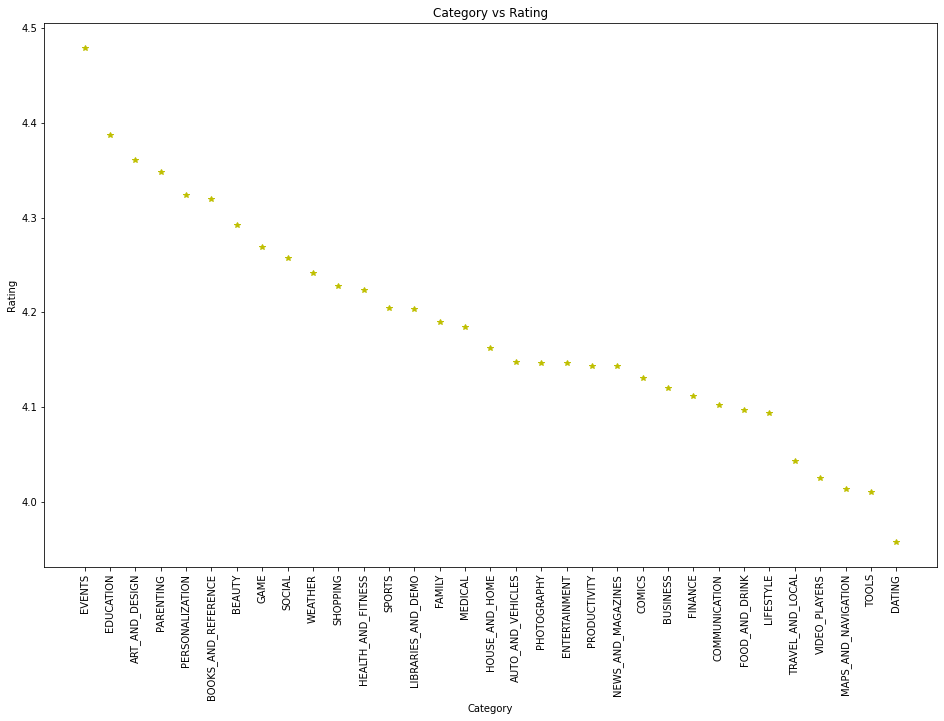

In [44]:
plt.figure(figsize = (16,10))
_ = plt.plot(w.sort_values(ascending= False), '*', color = 'y')
_ = plt.xticks(rotation = 90)
_ = plt.title('Category vs Rating')
_ = plt.xlabel('Category')
_ = plt.ylabel('Rating')
plt.show()

### Counting no. of each Content Rating

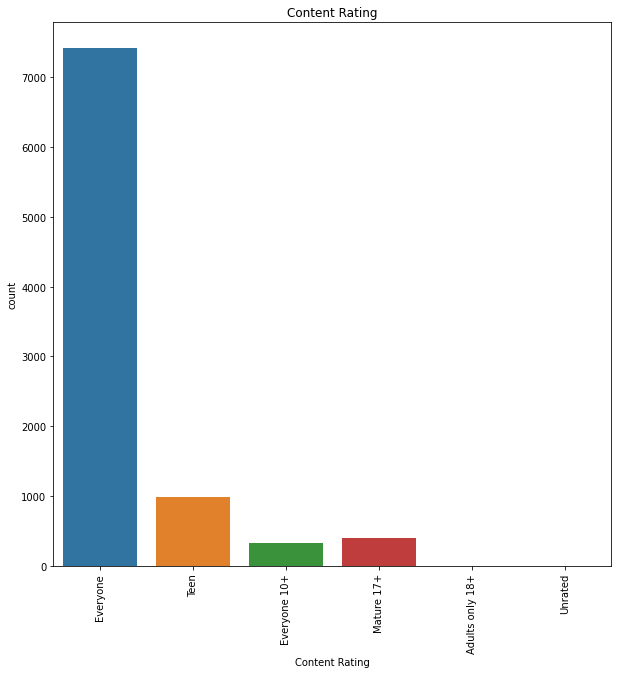

In [45]:
_ = plt.figure(figsize=(10,10))
_ = sns.countplot(data = df, x='Content Rating')
_ = plt.xticks(rotation=90)
_ = plt.title('Content Rating')
plt.show()